In [1]:
import pandas as pd
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
df = pd.read_csv(r"D:\data\ADANIPORTS.csv", index_col='Date')

In [2]:
#columns
df.columns.tolist()

['Symbol',
 'Series',
 'Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'VWAP',
 'Volume',
 'Turnover',
 'Trades',
 'Deliverable Volume',
 '%Deliverble']

In [3]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [4]:
#removal of unwanted columns
df1 = df.drop([ 'Series', 'VWAP',
 'Volume',
 'Turnover',
 'Trades',
 'Deliverable Volume',
 '%Deliverble'], axis = 1)
#print of new data
df1

,Symbol,Prev Close,Open,High,Low,Last,Close
Date,,,,,,,
2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.00,959.0,962.90
2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.00,885.0,893.90
2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.00,887.0,884.20
2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.00,929.0,921.55
2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.00,980.0,969.30
...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,725.35,733.00,739.65,728.90,729.2,730.75
2021-04-27,ADANIPORTS,730.75,735.00,757.50,727.35,748.6,749.15
2021-04-28,ADANIPORTS,749.15,755.00,760.00,741.10,743.4,746.25


In [5]:
# print the iris data (top 5 records)
df1[0:5]

,Symbol,Prev Close,Open,High,Low,Last,Close
Date,,,,,,,
2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90
2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90
2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20
2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55
2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30


In [6]:
# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
df1['Target'] = df1['Close'].shift(1).fillna(0)
df1

,Symbol,Prev Close,Open,High,Low,Last,Close,Target
Date,,,,,,,,
2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.00,959.0,962.90,0.00
2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.00,885.0,893.90,962.90
2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.00,887.0,884.20,893.90
2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.00,929.0,921.55,884.20
2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.00,980.0,969.30,921.55
...,...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,725.35,733.00,739.65,728.90,729.2,730.75,725.35
2021-04-27,ADANIPORTS,730.75,735.00,757.50,727.35,748.6,749.15,730.75
2021-04-28,ADANIPORTS,749.15,755.00,760.00,741.10,743.4,746.25,749.15


In [7]:
# Creating a DataFrame of given iris dataset.
data=pd.DataFrame(df1)
data.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,Target
Date,,,,,,,,
2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,0.00
2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,962.90
2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,893.90
2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,884.20
2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,921.55


In [8]:
data.columns.tolist()

['Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Target']

In [9]:
data.Symbol.unique()

array(['MUNDRAPORT', 'ADANIPORTS'], dtype=object)

In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Target']]  # Features
y=data['Symbol']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [15]:
#import
import category_encoders as ce

#Encoding 'department' col
encoder= ce.OrdinalEncoder(cols=['Symbol'],return_df=True,
                           mapping=[{'col':'Symbol',
'mapping':{'None':0,'MUNDRAPORT':1, 'ADANIPORTS':2,}}])

#Original data
data.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,Target
Date,,,,,,,,
2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,0.00
2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,962.90
2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,893.90
2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,884.20
2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,921.55


In [19]:
#fit and transform train data 
data_transformed = encoder.fit_transform(data)
data_transformed.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,Target
Date,,,,,,,,
2007-11-27,1,440.00,770.00,1050.00,770.0,959.0,962.90,0.00
2007-11-28,1,962.90,984.00,990.00,874.0,885.0,893.90,962.90
2007-11-29,1,893.90,909.00,914.75,841.0,887.0,884.20,893.90
2007-11-30,1,884.20,890.00,958.00,890.0,929.0,921.55,884.20
2007-12-03,1,921.55,939.75,995.00,922.0,980.0,969.30,921.55


In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8284854563691073


In [24]:
data['Target'][0:7].tolist()

[0.0, 962.9, 893.9, 884.2, 921.55, 969.3, 1041.45]

In [26]:
#Predicting the type of flower
clf.predict([[0.0, 962.9, 893.9, 884.2, 921.55, 969.3, 1041.45]])

array(['MUNDRAPORT'], dtype=object)

# Using Model Selection to improve the accuracy

### Will be taught in module 4

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 
#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions.
#Higher number of trees give you better performance but makes your code slower.

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
#import pandas as pd
#feature_imp = pd.Series().sort_values(ascending=False)
#feature_imp

No handles with labels found to put in legend.


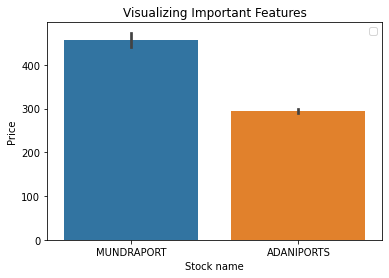

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=df1['Symbol'], y=df1['Close'])
# Add labels to your graph
plt.xlabel('Stock name')
plt.ylabel('Price')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Generating the model on selected features

In [39]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['Open', 'High', 'Low', 'Last', 'Close', 'Target']]  # Removed feature "sepal length"
y=data['Symbol']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [40]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8383490971625107
